# 1. Importing Libraries & Files

In [50]:
# Importing Libraries

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns                               
import locale
from plotnine import ggplot, aes, geom_bar, geom_text, theme, element_text


In [51]:
# Open JSON and save exchange data into variables

with open('data.json') as f:
    data = json.load(f)

    
btcturk_data = data[0]['btcturk']
binance_data = data[1]['binance']
paribu_data = data[2]['Paribu']

# 2. Cleaning & Storing Data in Variables

In [52]:
# Binance data cleaning

binance_24h_volume = str(int(float(binance_data['binance_volume'][0].replace('$', '').replace(',', ''))))
binance_24h_volume_in_btc = binance_data['binance_volume_in_btc'][0].replace(',', '')
binance_7d_volume = binance_data['7d_volume'].replace('$', '').replace(',', '')
binance_total_cryptocurrencies = binance_data['binance_total_cryptocurrencies'][0]
binance_mounthly_traffic = binance_data['mo_organic_traffic'].replace(',', '')
binance_ahref_ranking = binance_data['ahref_ranking'].replace(',', '')
binance_markets_no = binance_data['binance_markets'][0]
binance_market_dominance = binance_data['binance_market_dominance'][0].replace('%', '')
binance_rank = binance_data['binance_market_rank'][0].replace('#', '')
binance_markets = binance_data['markets']
binance_market_base_coins = [' '.join(market['Base Coin']) if isinstance(market['Base Coin'], list) else market['Base Coin'] for market in binance_markets]
binance_market_names = [' '.join(market['Name']) if isinstance(market['Name'], list) else market['Name'] for market in binance_markets]
binance_market_volumes = [' '.join(market['Volume']) if isinstance(market['Volume'], list) else market['Volume'].replace('$', '').replace(',', '') for market in binance_markets]
binance_market_volumes_percentage = [' '.join(market['Volume %']).replace('%', '') if isinstance(market['Volume %'], list) else market['Volume %'].replace('%', '')for market in binance_markets]

In [53]:
# BtcTurk data cleaning

btcturk_24h_volume = str(int(float(btcturk_data['btcturk_volume'][0].replace('$', '').replace(',', ''))))
btcturk_24h_volume_in_btc = btcturk_data['btcturk_volume_in_btc'][0].replace(',', '')
btcturk_7d_volume = btcturk_data['7d_volume'].replace('$', '').replace(',', '')
btcturk_total_cryptocurrencies = btcturk_data['btcturk_total_cryptocurrencies'][0]
btcturk_mounthly_traffic = btcturk_data['mo_organic_traffic'].replace(',', '')
btcturk_ahref_ranking = btcturk_data['ahref_ranking'].replace(',', '')
btcturk_markets_no = btcturk_data['btcturk_markets_raw'][0]
btcturk_market_dominance = btcturk_data['btcturk_market_dominance'][0].replace('%', '')
btcturk_rank = btcturk_data['btcturk_market_rank'][0].replace('#', '')
btcturk_markets = btcturk_data['markets']
btcturk_market_base_coins = [' '.join(market['Base Coin']) if isinstance(market['Base Coin'], list) else market['Base Coin'] for market in btcturk_markets]
btcturk_market_names = [' '.join(market['Name']) if isinstance(market['Name'], list) else market['Name'] for market in btcturk_markets]
btcturk_market_volumes = [' '.join(market['Volume']) if isinstance(market['Volume'], list) else market['Volume'].replace('$', '').replace(',', '') for market in btcturk_markets]
btcturk_market_volumes_percentage = [' '.join(market['Volume %']).replace('%', '') if isinstance(market['Volume %'], list) else market['Volume %'].replace('%', '')for market in btcturk_markets]

In [54]:
# Paribu data cleaning

paribu_24h_volume = str(int(float(paribu_data['paribu_volume'][0].replace('$', '').replace(',', ''))))
paribu_24h_volume_in_btc = paribu_data['paribu_volume_in_btc'][0].replace(',', '')
paribu_7d_volume = paribu_data['7d_volume'].replace('$', '').replace(',', '')
paribu_total_cryptocurrencies = paribu_data['paribu_total_cryptocurrencies'][0]
paribu_mounthly_traffic = paribu_data['mo_organic_traffic'].replace(',', '')
paribu_ahref_ranking = paribu_data['ahref_ranking'].replace(',', '')
paribu_markets_no = paribu_data['paribu_markets'][0]
paribu_market_dominance = paribu_data['paribu_market_dominance'][0].replace('%', '')
paribu_rank = paribu_data['paribu_market_rank'][0].replace('#', '')
paribu_markets = paribu_data['markets']
paribu_market_base_coins = [' '.join(market['Base Coin']) if isinstance(market['Base Coin'], list) else market['Base Coin'] for market in paribu_markets]
paribu_market_names = [' '.join(market['Name']) if isinstance(market['Name'], list) else market['Name'] for market in paribu_markets]
paribu_market_volumes = [' '.join(market['Volume']) if isinstance(market['Volume'], list) else market['Volume'].replace('$', '').replace(',', '') for market in paribu_markets]
paribu_market_volumes_percentage = [' '.join(market['Volume %']).replace('%', '') if isinstance(market['Volume %'], list) else market['Volume %'].replace('%', '')for market in paribu_markets]

In [55]:
# Caculate Total Value in each Exchange

binance_total_maerket_volume = 0
for i in binance_market_volumes:
    n = int(i)
    binance_total_maerket_volume += n
    
btcturk_total_maerket_volume = 0
for i in btcturk_market_volumes:
    n = int(i)
    btcturk_total_maerket_volume += n
    
paribu_total_maerket_volume = 0
for i in paribu_market_volumes:
    n = int(i)
    paribu_total_maerket_volume += n

In [85]:
# Calculating Top Markets in Tukey

market_percentage_dict = {}


def update_dictionary(df):
    for index, row in df.iterrows():
        if row['market'] in market_percentage_dict:
            market_percentage_dict[row['market']] += int(row['volume'])
        else:
            market_percentage_dict[row['market']] = int(row['volume'])

# Update dictionary for each DataFrame
update_dictionary(binance_top_20)
update_dictionary(btcturk_top_20)
update_dictionary(paribu_top_20)

sorted_dict = dict(sorted(market_percentage_dict.items(), key=lambda item: item[1], reverse=True))


# Output the dictionary
print(market_percentage_dict)


{'USDT/TRY': 229208115, 'BOME/TRY': 66938384, 'USDC/USDT': 23701051, 'ETHFI/TRY': 19729673, 'AVAX/USDT': 39801763, 'AVAX/TRY': 51942789, 'FLOKI/TRY': 53339589, 'OM/TRY': 13581377, 'SOL/TRY': 25008130, 'SHIB/TRY': 23525758, 'WIF/TRY': 8685965, 'SOL/FDUSD': 8492477, 'BTC/TRY': 39045415, 'BONK/TRY': 14206761, 'BTC/USDT': 14297516, 'XRP/TRY': 19980495, 'COS/TRY': 6107623, 'FDUSD/TRY': 5529700, 'BTC/FDUSD': 5347197, 'FET/TRY': 15207594, 'PEPE/TRY': 19099227, 'LUNC/TRY': 10908003, 'SOL/USDT': 10728634, 'AMP/TRY': 9723990, 'LUNA/TRY': 7714174, 'RNDR/TRY': 6864791, 'PEPE/USDT': 6569234, 'ETH/USDT': 6442750, 'XRP/USDT': 4899593, 'FET/USDT': 4687681, 'JUP/TRY': 7110805, 'VANRY/TRY': 5648972, 'CLV/TRY': 3109312, 'JOE/TRY': 3099434, 'ARB/TRY': 2285938, 'RACA/TRY': 1958595, 'BTTC/TRY': 1908019, 'FTM/TRY': 1818636, 'RAD/TRY': 1815556}


# 3. Creting DataFrames

### 3.1. Exchange Statistics DataFrame

In [57]:
exchanges = ['Binance Tr', 'BtcTurk', 'Paribu']
volumes_24h = [binance_24h_volume, btcturk_24h_volume, paribu_24h_volume]
volumes_24h_btc = [binance_24h_volume_in_btc, btcturk_24h_volume_in_btc, paribu_24h_volume_in_btc]
volumes_7d = [binance_7d_volume, btcturk_7d_volume, paribu_7d_volume]
total_cryptocurrencies = [binance_total_cryptocurrencies, btcturk_total_cryptocurrencies, paribu_total_cryptocurrencies]
mounthly_website_traffics = [binance_mounthly_traffic, btcturk_mounthly_traffic, paribu_mounthly_traffic]
ahref_rankings = [binance_ahref_ranking, btcturk_ahref_ranking, paribu_ahref_ranking]
number_of_markets = [binance_markets_no, btcturk_markets_no, paribu_markets_no]
dominances = [binance_market_dominance, btcturk_market_dominance, paribu_market_dominance]
ranks = [binance_rank, btcturk_rank, paribu_rank]


df_exchange_data = pd.DataFrame({
    'Exchange': exchanges,
    '24H Volume($)': volumes_24h,
    '24H Volume(BTC)': volumes_24h_btc,
    '7D Volume($)': volumes_7d,
    'Total Cryptocurrencies': total_cryptocurrencies,
    'Number of Markets': number_of_markets,
    'Exchange Rank': ranks, 
    'Exchange Dominance among all Exchanges': dominances,
    'Mounthly Website Traffic': mounthly_website_traffics,
    'Ahref Ranking': ahref_rankings,})

In [58]:
df_exchange_data

,Exchange,24H Volume($),24H Volume(BTC),7D Volume($),Total Cryptocurrencies,Number of Markets,Exchange Rank,Exchange Dominance among all Exchanges,Mounthly Website Traffic,Ahref Ranking
0,Binance Tr,586762474,9107,127405950372,183,206,21,0.39,172027,296536
1,BtcTurk,312034426,4843,82428737546,108,208,88,0.21,20235,208255
2,Paribu,182839091,2838,54749306845,146,153,100,0.12,724411,188513


In [59]:
df_exchange_data['Number of Markets'][0]

'206'

In [60]:
df_exchange_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Exchange                                3 non-null      object
 1   24H Volume($)                           3 non-null      object
 2   24H Volume(BTC)                         3 non-null      object
 3   7D Volume($)                            3 non-null      object
 4   Total Cryptocurrencies                  3 non-null      object
 5   Number of Markets                       3 non-null      object
 6   Exchange Rank                           3 non-null      object
 7   Exchange Dominance among all Exchanges  3 non-null      object
 8   Mounthly Website Traffic                3 non-null      object
 9   Ahref Ranking                           3 non-null      object
dtypes: object(10)
memory usage: 372.0+ bytes


In [61]:
# Changing dtypes of each column

df_exchange_data['Exchange'] = df_exchange_data['Exchange'].astype('category')
df_exchange_data['24H Volume($)'] = df_exchange_data['24H Volume($)'].astype('int')
df_exchange_data['24H Volume(BTC)'] = df_exchange_data['24H Volume(BTC)'].astype('int')
df_exchange_data['7D Volume($)'] = df_exchange_data['7D Volume($)'].astype('int')
df_exchange_data['Total Cryptocurrencies'] = df_exchange_data['Total Cryptocurrencies'].astype('int')
df_exchange_data['Number of Markets'] = df_exchange_data['Number of Markets'].astype('int')
df_exchange_data['Exchange Rank'] = df_exchange_data['Exchange Rank'].astype('int')
df_exchange_data['Exchange Dominance among all Exchanges'] = df_exchange_data['Exchange Dominance among all Exchanges'].astype('float')
df_exchange_data['Mounthly Website Traffic'] = df_exchange_data['Mounthly Website Traffic'].astype('int')
df_exchange_data['Ahref Ranking'] = df_exchange_data['Ahref Ranking'].astype('int')
df_exchange_data['24H Volume($)'] = df_exchange_data['24H Volume($)'] / 1e6
df_exchange_data['7D Volume($)'] = df_exchange_data['7D Volume($)'] / 1e9
df_exchange_data['Mounthly Website Traffic'] = df_exchange_data['Mounthly Website Traffic'] / 1e3

In [62]:
df_exchange_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Exchange                                3 non-null      category
 1   24H Volume($)                           3 non-null      float64 
 2   24H Volume(BTC)                         3 non-null      int64   
 3   7D Volume($)                            3 non-null      float64 
 4   Total Cryptocurrencies                  3 non-null      int64   
 5   Number of Markets                       3 non-null      int64   
 6   Exchange Rank                           3 non-null      int64   
 7   Exchange Dominance among all Exchanges  3 non-null      float64 
 8   Mounthly Website Traffic                3 non-null      float64 
 9   Ahref Ranking                           3 non-null      int64   
dtypes: category(1), float64(4), int64(5)
memory usage: 483

### 3.2. Exchange's Markets DataFrame

In [63]:
binance_markets = pd.DataFrame({
    'market': binance_market_names,
    'volume': binance_market_volumes,
    'percentage': binance_market_volumes_percentage
})

binance_markets.head()

,market,volume,percentage
0,USDT/TRY,169581147,28.90
1,BOME/TRY,66938384,11.41
2,USDC/USDT,23701051,4.04
3,ETHFI/TRY,19729673,3.36
4,AVAX/USDT,18344717,3.13


In [64]:
btcturk_markets = pd.DataFrame({
    'market': btcturk_market_names,
    'volume': btcturk_market_volumes,
    'percentage': btcturk_market_volumes_percentage
})

btcturk_markets.head()

,market,volume,percentage
0,USDT/TRY,32053440,10.27
1,FLOKI/TRY,24178458,7.75
2,AVAX/TRY,21263343,6.81
3,AVAX/USDT,19016462,6.09
4,PEPE/TRY,12609807,4.04


In [65]:
paribu_markets = pd.DataFrame({
    'market': paribu_market_names,
    'volume': paribu_market_volumes,
    'percentage': paribu_market_volumes_percentage
})

paribu_markets.head()

,market,volume,percentage
0,USDT/TRY,27573528,15.08
1,BTC/TRY,22397666,12.25
2,FLOKI/TRY,13881718,7.59
3,AVAX/TRY,12943764,7.08
4,JUP/TRY,7110805,3.89


### 3.3. Top 20 Markets of Exchanges DataFrame

In [66]:
binance_top_20 = binance_markets.head(20)
btcturk_top_20 = btcturk_markets.head(20)
paribu_top_20 = paribu_markets.head(20)

binance_top_20

,market,volume,percentage
0,USDT/TRY,169581147,28.90
1,BOME/TRY,66938384,11.41
2,USDC/USDT,23701051,4.04
3,ETHFI/TRY,19729673,3.36
4,AVAX/USDT,18344717,3.13
5,AVAX/TRY,17735682,3.02
6,FLOKI/TRY,15279413,2.60
7,OM/TRY,13581377,2.31
8,SOL/TRY,10893469,1.86
9,SHIB/TRY,10774292,1.84


### 3.4. Number of Markets DataFrame

In [67]:
exchange_names_markets_df = ['Binance TR', 'BtcTurk', 'Paribu']
makets_coinmarketcap = [206, 208, 153]  # Added Manualy
makets_Bitdegree = [df_exchange_data['Number of Markets'][0], df_exchange_data['Number of Markets'][1], df_exchange_data['Number of Markets'][2]]



ex_markets_df = pd.DataFrame({
    'Exchange': exchange_names_markets_df,
    'CoinMarketCap Markets': makets_coinmarketcap,
    'Bitdegree Markets': makets_Bitdegree
    
})

In [68]:
ex_markets_df

,Exchange,CoinMarketCap Markets,Bitdegree Markets
0,Binance TR,206,206
1,BtcTurk,208,208
2,Paribu,153,153


### 3.5. Exchange Assets DataFrame

In [69]:
df_binance_assets = pd.DataFrame({
    'Base Coin': binance_market_base_coins,
    'Market Name': binance_market_names,
    'Volume': binance_market_volumes,
    'Percentage': binance_market_volumes_percentage
})

df_binance_assets.head()

,Base Coin,Market Name,Volume,Percentage
0,Tether,USDT/TRY,169581147,28.90
1,BOOK OF MEME,BOME/TRY,66938384,11.41
2,USD Coin,USDC/USDT,23701051,4.04
3,ether.fi,ETHFI/TRY,19729673,3.36
4,Avalanche,AVAX/USDT,18344717,3.13


In [70]:
df_btcturk_assets = pd.DataFrame({
    'Base Coin': btcturk_market_base_coins,
    'Market Name': btcturk_market_names,
    'Volume': btcturk_market_volumes,
    'Percentage': btcturk_market_volumes_percentage
})

df_btcturk_assets.head()

,Base Coin,Market Name,Volume,Percentage
0,Tether,USDT/TRY,32053440,10.27
1,Floki Inu,FLOKI/TRY,24178458,7.75
2,Avalanche,AVAX/TRY,21263343,6.81
3,Avalanche,AVAX/USDT,19016462,6.09
4,Pepe Coin,PEPE/TRY,12609807,4.04


In [71]:
df_paribu_assets = pd.DataFrame({
    'Base Coin': paribu_market_base_coins,
    'Market Name': paribu_market_names,
    'Volume': paribu_market_volumes,
    'Percentage': paribu_market_volumes_percentage
})

df_paribu_assets.head()

,Base Coin,Market Name,Volume,Percentage
0,Tether,USDT/TRY,27573528,15.08
1,Bitcoin,BTC/TRY,22397666,12.25
2,Floki Inu,FLOKI/TRY,13881718,7.59
3,Avalanche,AVAX/TRY,12943764,7.08
4,Jupiter,JUP/TRY,7110805,3.89


## 4. Data Visualizing

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


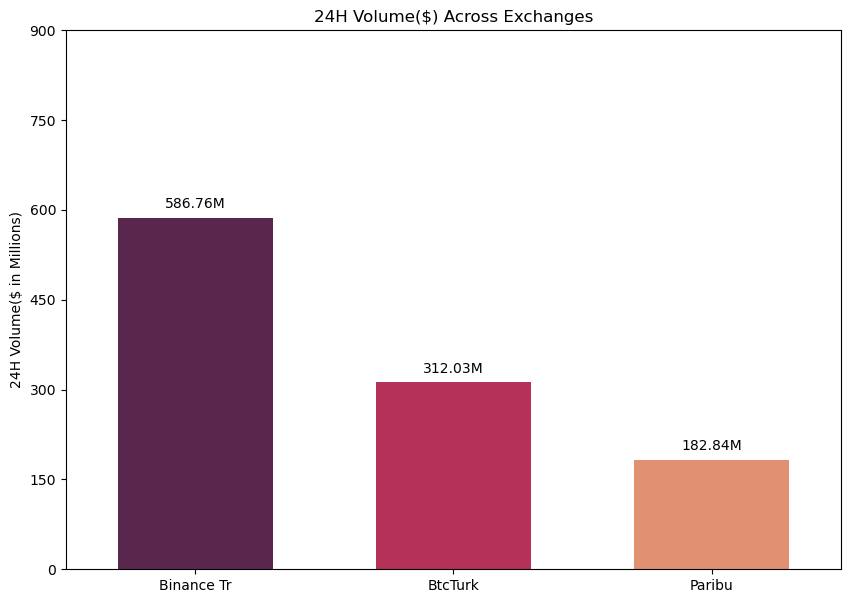

In [72]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 7))
ax = sns.barplot(x='Exchange', y='24H Volume($)', data=df_exchange_data, palette='rocket', order=df_exchange_data['Exchange'], width=0.6)

# Customize y-axis ticks to represent specific values in millions
ax.set_yticks([0, 150, 300, 450, 600, 750, 900])

# Customize y-axis labels to represent values in millions
#ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.0f}M'))

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('24H Volume($) Across Exchanges')
plt.xlabel('')
plt.ylabel('24H Volume($ in Millions)')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


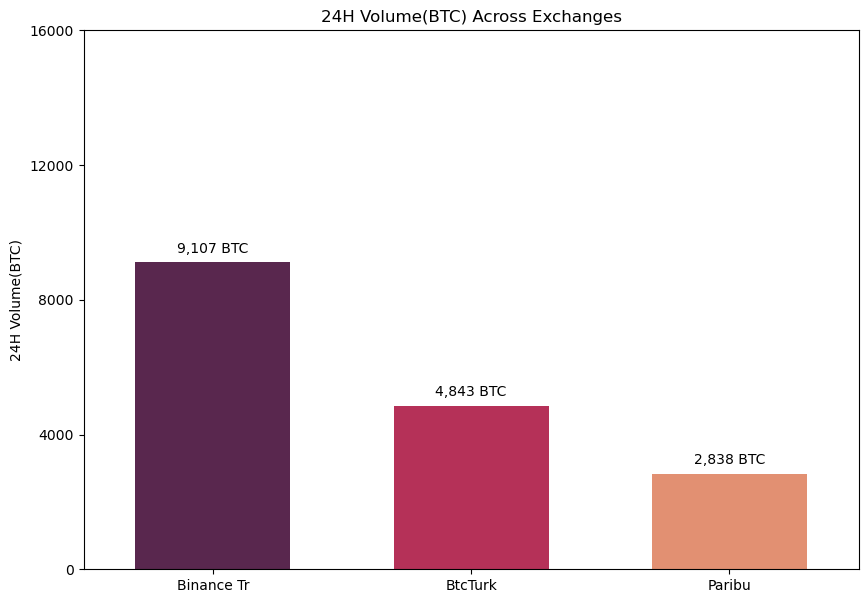

In [73]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 7))
ax = sns.barplot(x='Exchange', y='24H Volume(BTC)', data=df_exchange_data, palette='rocket', order=df_exchange_data['Exchange'], width=0.6)

# Customize y-axis ticks to represent specific values
ax.set_yticks([0, 4000, 8000, 12000, 16000])

# Annotate each bar with its value formatted with commas and append "BTC"
for p in ax.patches:
    height = p.get_height()
    formatted_value = '{:,.0f}'.format(height)  # Add commas as thousands separators
    ax.annotate(f'{formatted_value} BTC', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('24H Volume(BTC) Across Exchanges')
plt.xlabel('')
plt.ylabel('24H Volume(BTC)')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


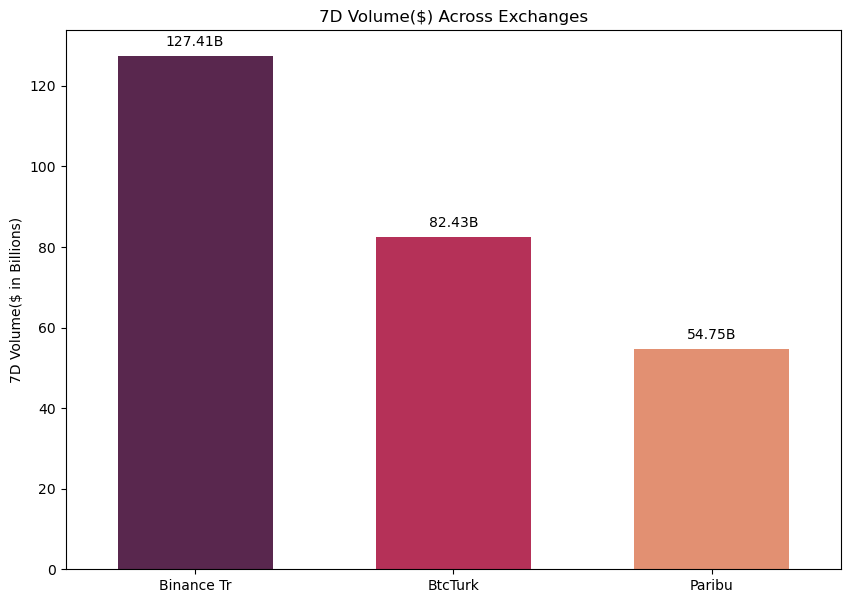

In [74]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 7))
ax = sns.barplot(x='Exchange', y='7D Volume($)', data=df_exchange_data, palette='rocket', order=df_exchange_data['Exchange'], width=0.6)

# Customize y-axis ticks to represent specific values in millions
ax.set_yticks([0, 20, 40, 60, 80, 100, 120])

# Customize y-axis labels to represent values in millions
#ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.0f}B'))

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}B', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('7D Volume($) Across Exchanges')
plt.xlabel('')
plt.ylabel('7D Volume($ in Billions)')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


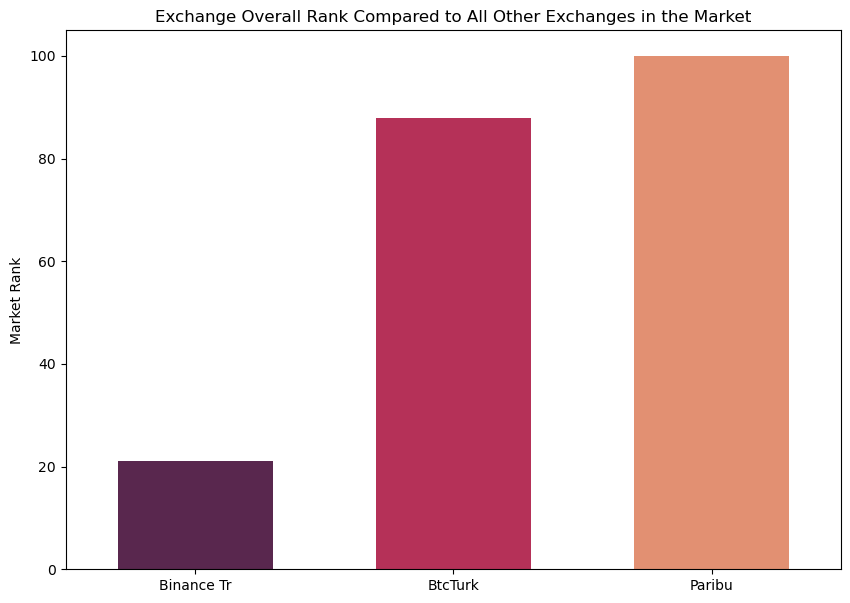

In [75]:
plt.figure(figsize=(10, 7))

ax = sns.barplot(df_exchange_data, x='Exchange', y='Exchange Rank', palette='rocket', order=df_exchange_data['Exchange'], width=0.6)

plt.title('Exchange Overall Rank Compared to All Other Exchanges in the Market')
plt.xlabel('')
plt.ylabel('Market Rank')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


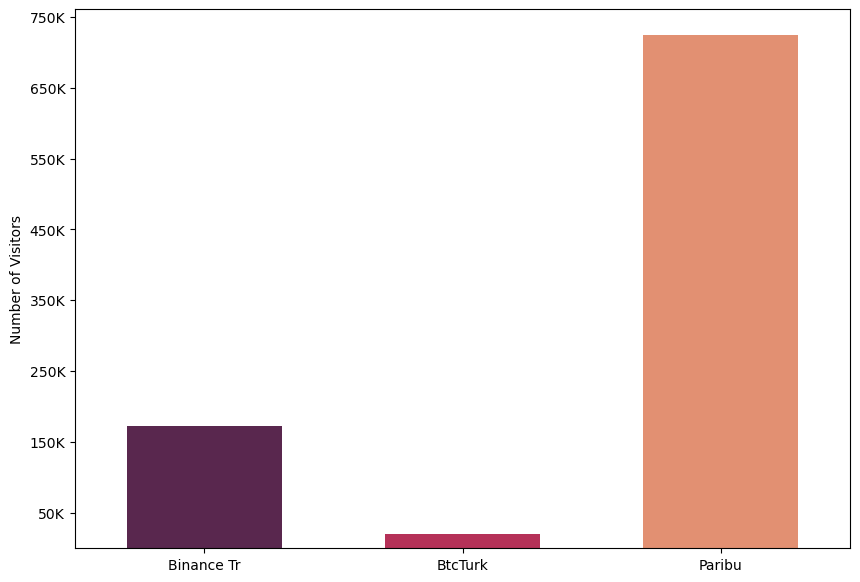

In [76]:
plt.figure(figsize=(10, 7))

ax = sns.barplot(df_exchange_data, x='Exchange', y='Mounthly Website Traffic', palette='rocket', order=df_exchange_data['Exchange'], width=0.6)

ax.set_yticks([50, 150, 250, 350, 450, 550, 650, 750])
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.0f}K'))


plt.title('')
plt.xlabel('')
plt.ylabel('Number of Visitors')
plt.show()


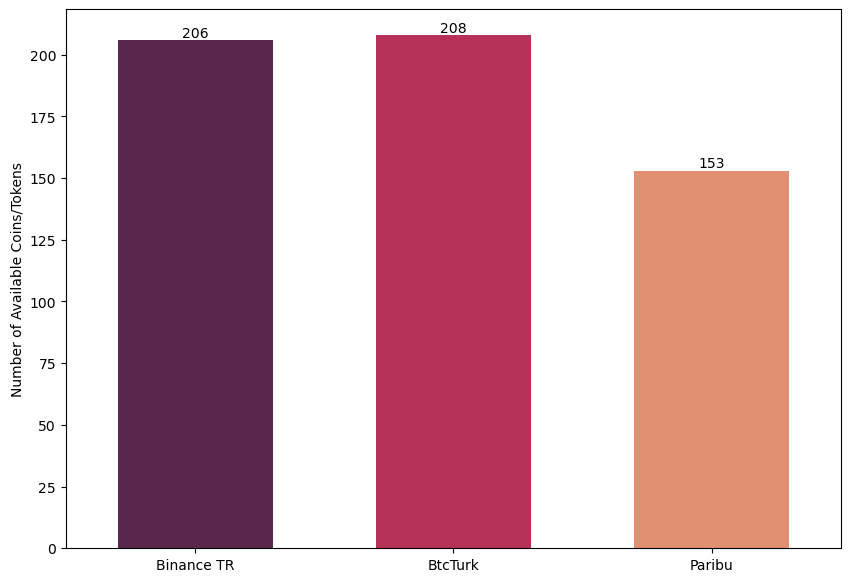

In [77]:
plt.figure(figsize=(10, 7))

ax = sns.barplot(ex_markets_df, x='Exchange', y='Bitdegree Markets', palette='rocket', order=ex_markets_df['Exchange'], width=0.6)

# Add value labels above each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.title('')
plt.xlabel('')
plt.ylabel('Number of Available Coins/Tokens')
plt.show()


### 4.2. Preparing Data Types for PieChart

In [78]:
df_binance_assets['Percentage'] = pd.to_numeric(df_binance_assets['Percentage'])
df_sorted = df_binance_assets.sort_values(by='Percentage', ascending=False)
total_percentage = df_sorted['Percentage'].sum()
other_percentage = 100 - df_sorted['Percentage'][:17].sum()
pie_data = df_sorted.head(17)
pie_data.loc[17] = ['Other Projects', '', other_percentage, other_percentage]


/var/folders/bf/26td72cx2qb7f72d8903rzcc0000gn/T/ipykernel_10986/1153916323.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


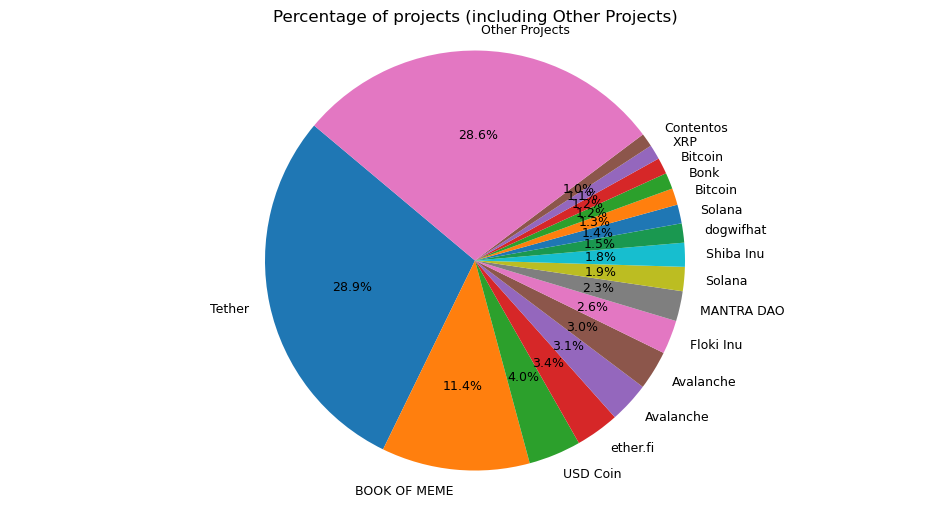

In [86]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)

custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#1a9850']

plt.pie(pie_data['Percentage'], labels=pie_data['Base Coin'], autopct='%1.1f%%', startangle=140, textprops={'fontsize': 9}, colors=custom_colors)
plt.title('Percentage of projects (including Other Projects)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()



/var/folders/bf/26td72cx2qb7f72d8903rzcc0000gn/T/ipykernel_10986/4153115803.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


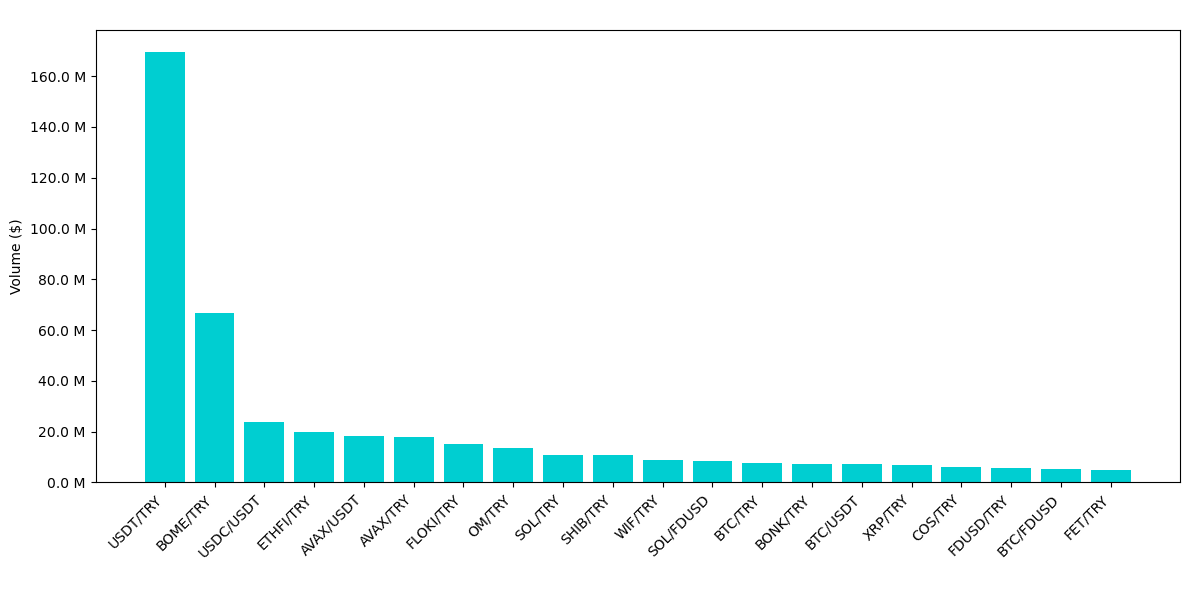

In [81]:
import matplotlib.ticker as ticker



top_20_projects = df_binance_assets.head(20)

# Data preprocessing: converting 'Volume' column to numeric
top_20_projects['Volume'] = pd.to_numeric(top_20_projects['Volume'])

# Data for plotting
coins = top_20_projects['Market Name']
volume = top_20_projects['Volume']

# Bar plot for top 20 projects by volume
plt.figure(figsize=(12, 6))
plt.bar(coins, volume, color='darkturquoise')
plt.xlabel(' ')
plt.ylabel('Volume ($)')
plt.title(' ')

# Custom formatting for y-axis ticks
formatter = ticker.FuncFormatter(lambda x, pos: f'{x / 1e6:.1f} M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()